In [1]:
#import libs
import os, glob
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")
from functions import *

In [2]:
DATA_PATH = '../data/processed/Sites_KPI_processed.parquet'

In [3]:
df = pd.read_parquet(DATA_PATH)
df.head(1)

,Time,eNodeB Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,TE Hourly Avala,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,2022-04-01,LCAIW30340_Site_83,99.9821,0.2975,0.017,99.9654,4.0582,100.0,100.0,100.0,100.0,1,0,0,32400,1,2,5888,5783,5601


In [4]:
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour
df.head(1)

,Time,eNodeB Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,TE Hourly Avala,...,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts,Day,Hour
0,2022-04-01,LCAIW30340_Site_83,99.9821,0.2975,0.017,99.9654,4.0582,100.0,100.0,100.0,...,0,0,32400,1,2,5888,5783,5601,1,0


In [5]:
df.drop(['Time'],axis=1,inplace=True)
df.head(1)

,eNodeB Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,TE Hourly Avala,TE Availabity Daily,...,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts,Day,Hour
0,LCAIW30340_Site_83,99.9821,0.2975,0.017,99.9654,4.0582,100.0,100.0,100.0,100.0,...,0,0,32400,1,2,5888,5783,5601,1,0


In [6]:
df_one_hour = df[(df['Day']==8)&(df['Hour']==0)]
df_one_hour.drop(['Day','Hour'],axis=1,inplace=True)
df_one_hour.to_csv("onehour.csv",index=False)

In [7]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('onehour.csv', index_col='eNodeB Name')
original_data.head()

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,TE Hourly Avala,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
eNodeB Name,,,,,,,,,,,,,,,,,,
LCAIW30340_Site_83,99.9880,1.0945,0.1053,99.9648,6.0615,100.0,100.0,100.0,100.0,9,0,0,32400,1,3,8549,8529,8365
LCAIE10014_Site_210,99.9673,0.4408,0.1799,99.9409,6.3922,100.0,100.0,100.0,100.0,12,0,0,21600,2,4,6671,6766,6123
LCAIE10010_Nasr City 2 LE,99.9755,0.6453,0.2076,99.9310,7.4508,100.0,100.0,100.0,100.0,18,0,0,21600,2,6,8672,8698,8157
LCAIN20172_Sheheby,100.0000,0.1299,0.3324,99.8858,1.8551,100.0,100.0,100.0,100.0,6,0,0,32400,0,2,1805,1752,1718
LCAIE30093_01-3-14-73,100.0000,0.8142,0.2463,99.9240,7.6905,100.0,100.0,100.0,100.0,13,0,0,21600,0,4,5279,5265,4709


In [8]:
X = original_data[['EPM_RRC_SR', 'EPM_UL_Traffic_GB', 'EPM_ERAB_SR','EPM_DL_Traffic_GB','EPM_CSFB_Preparation_SR','EPM_CSFB_SR']]
X.head(1)

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR
eNodeB Name,,,,,,
LCAIW30340_Site_83,99.988,1.0945,99.9648,6.0615,100.0,100.0


In [9]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.18518288,  1.27405852,  0.54825027,  0.14838443,  0.14097868,
         0.03482094],
       [-0.04078486, -0.13198052,  0.43374023,  0.22677058,  0.14097868,
         0.03482094],
       [ 0.04872893,  0.30787719,  0.38630721,  0.47769161,  0.14097868,
         0.03482094],
       ...,
       [ 0.31617866,  0.92131199,  0.13333106,  0.58686809,  0.14097868,
         0.03482094],
       [-1.17935658, -0.83360196, -0.48856862, -0.99261174,  0.14097868,
         0.03482094],
       [ 0.20919877,  1.17167599,  0.13764316,  0.92112922,  0.14097868,
         0.03482094]])

In [10]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [11]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,cluster
eNodeB Name,,,,,,,
LCAIW30340_Site_83,0.185183,1.274059,0.548250,0.148384,0.140979,0.034821,2
LCAIE10014_Site_210,-0.040785,-0.131981,0.433740,0.226771,0.140979,0.034821,1
LCAIE10010_Nasr City 2 LE,0.048729,0.307877,0.386307,0.477692,0.140979,0.034821,2
LCAIN20172_Sheheby,0.316179,-0.800693,0.169744,-0.848663,0.140979,0.034821,1
LCAIE30093_01-3-14-73,0.316179,0.671163,0.352769,0.534508,0.140979,0.034821,2


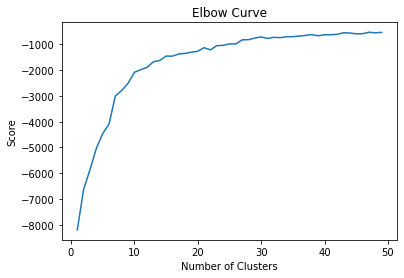

In [12]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [14]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
eNodeB Name,,,
LCAIW30340_Site_83,0.986248,-0.501641,2
LCAIE10014_Site_210,0.043674,-0.285777,1
LCAIE10010_Nasr City 2 LE,0.536141,-0.308443,2
LCAIN20172_Sheheby,-1.161191,-0.357195,1
LCAIE30093_01-3-14-73,0.845672,-0.466647,2


In [15]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

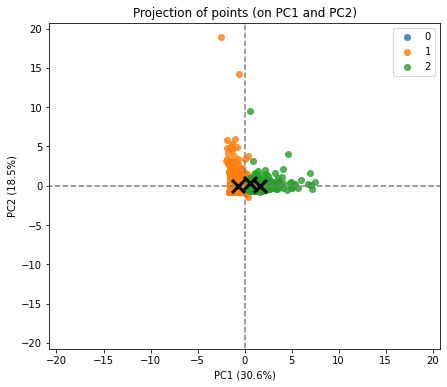

In [16]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

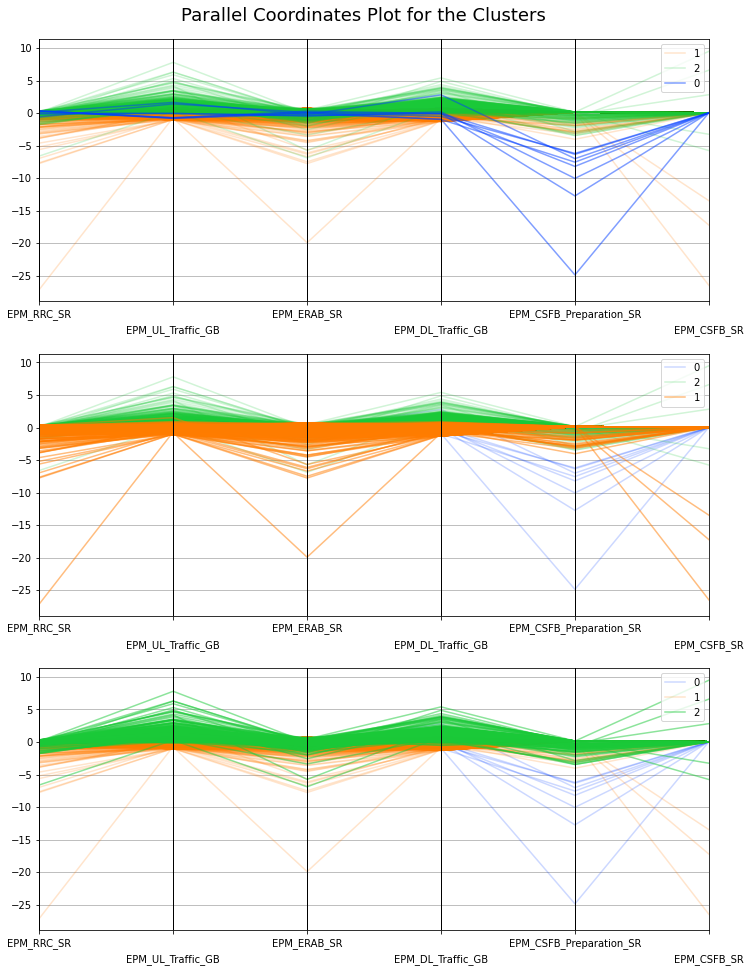

In [17]:
from functions import *
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

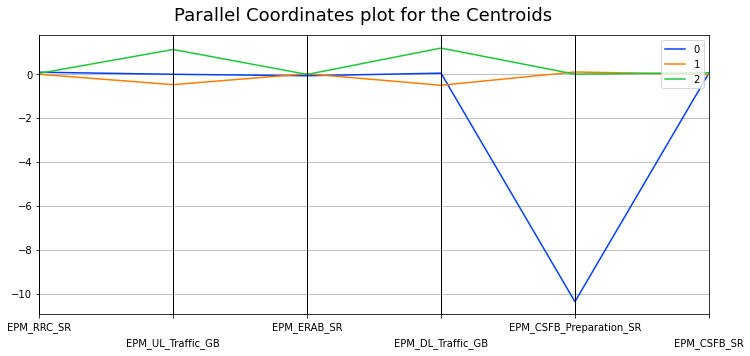

In [18]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)